In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("CarPrice_1.csv", encoding='unicode_escape')
print(df)

     car_ID  symboling                   CarName fueltype aspiration  \
0         1          3        alfa-romero giulia      gas        std   
1         2          3       alfa-romero stelvio      gas        std   
2         3          1  alfa-romero Quadrifoglio      gas        std   
3         4          2               audi 100 ls      gas        std   
4         5          2                audi 100ls      gas        std   
..      ...        ...                       ...      ...        ...   
200     201         -1           volvo 145e (sw)      gas        std   
201     202         -1               volvo 144ea      gas      turbo   
202     203         -1               volvo 244dl      gas        std   
203     204         -1                 volvo 246   diesel      turbo   
204     205         -1               volvo 264gl      gas      turbo   

    doornumber      carbody drivewheel enginelocation  wheelbase  ...  \
0          two  convertible        rwd          front       88

In [3]:
label_encoder = preprocessing.LabelEncoder()
cols_tbe = [
    'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
    'drivewheel', 'enginelocation', 'fuelsystem', 'enginetype', 'cylindernumber'
]
for col_tbe in cols_tbe:
    df[col_tbe] = df[col_tbe].astype('|S')
    df[col_tbe] = label_encoder.fit_transform(df[col_tbe])

In [4]:
X = df.iloc[:, 0:-1].values
y = df.iloc[:, -1].values


In [5]:
X_std = preprocessing.StandardScaler().fit_transform(X)
cov_m = np.cov(X_std, rowvar=False)
cov_m = np.cov(X_std.T)

In [6]:
eig_vals, eig_vecs = np.linalg.eig(cov_m)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i])
             for i in range(len(eig_vals))]
eig_pairs.sort()
eig_pairs.reverse()
tot = sum(eig_vals)

In [7]:
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
matrix_w = np.hstack((
    eig_pairs[0][1].reshape(25, 1),
    eig_pairs[1][1].reshape(25, 1),
    eig_pairs[2][1].reshape(25, 1),
    eig_pairs[3][1].reshape(25, 1),
    eig_pairs[4][1].reshape(25, 1),
    eig_pairs[5][1].reshape(25, 1),
    eig_pairs[6][1].reshape(25, 1),
    eig_pairs[7][1].reshape(25, 1),
    eig_pairs[8][1].reshape(25, 1),
    eig_pairs[9][1].reshape(25, 1),
    eig_pairs[10][1].reshape(25, 1),
    eig_pairs[11][1].reshape(25, 1),
    eig_pairs[12][1].reshape(25, 1),
    eig_pairs[13][1].reshape(25, 1),
    eig_pairs[14][1].reshape(25, 1)
))
print(matrix_w)

[[-0.0530612  -0.15780729  0.28115162 -0.53681608  0.13036998 -0.03732289
   0.05225645  0.10738291 -0.16251955  0.10472156 -0.12181581 -0.01884533
   0.11975285 -0.00862808  0.03114072]
 [ 0.1026303   0.31355768 -0.18892533 -0.18999802  0.11491157  0.01310962
   0.09851927  0.03120614  0.12207976  0.3732364   0.45975907  0.03660834
  -0.17640076 -0.31964258  0.02910911]
 [-0.0079138  -0.14621159  0.30767919 -0.54016941  0.11960665 -0.10280223
   0.03306223  0.10245291 -0.15855527  0.05287005 -0.0687729  -0.02773764
   0.12285491 -0.06851904  0.03529164]
 [ 0.06343377  0.30075472  0.42985834  0.18421945  0.15860263  0.08630833
  -0.02501238  0.11627602 -0.08854286 -0.13806603  0.0146322  -0.10721662
   0.03961976  0.07348241 -0.0429382 ]
 [-0.12335074 -0.07556525 -0.24502515 -0.09388303  0.25699314 -0.25018326
   0.52472881 -0.28474162  0.26283937 -0.37137005 -0.14272723 -0.20469235
   0.11287209  0.09504438  0.00393131]
 [ 0.0934437   0.31867252 -0.2491698  -0.16050996  0.10960127  0.

In [8]:
Y = X_std.dot(matrix_w)

In [9]:
principalDf = pd.DataFrame(
    data=Y,
    columns=[
        'PC1', 'PC2', 'PC3', 'PC4', 'PC5',
        'PC6', 'PC7', 'PC8', 'PC9', 'PC10',
        'PC11', 'PC12', 'PC13', 'PC14', 'PC15'
    ]
)
final_df = pd.concat([principalDf, pd.DataFrame(y, columns=['price'])], axis=1)
print(final_df)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    0.838260  3.894508 -1.917195 -0.207639  1.461735  1.377403 -2.062071   
1    0.837170  3.888268 -1.904924 -0.229913  1.466861  1.374260 -2.060379   
2   -0.241899  2.832337 -1.593560  1.815639 -1.499804 -0.679208  0.351206   
3    0.270004  0.594281 -0.401089  2.349924  0.128928 -0.442917  0.040355   
4   -0.585233  0.946251  0.073819  2.982460  1.054990  0.607461  1.285642   
..        ...       ...       ...       ...       ...       ...       ...   
200 -3.208494 -1.190565  2.183084 -1.066216 -0.016857 -0.137163 -0.884678   
201 -4.213526 -0.864031  1.702951 -1.256510  0.692030 -0.798580  0.668550   
202 -3.710446 -0.207053  2.784065 -0.981998 -1.849189 -0.558201  0.240878   
203 -3.078550 -3.960742 -2.037249 -2.217478 -1.092129 -2.250524  0.226354   
204 -3.912201 -1.191188  1.705681 -1.321864  0.683614 -0.881132  0.637544   

          PC8       PC9      PC10      PC11      PC12      PC13      PC14  

# Linear Regression without PCA

In [10]:
data = df.values
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [11]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('R2 Score (without using PCA):', r2_score(y_test, y_pred))

R2 Score (without using PCA): 0.7961110382079469


# Linear Regression with PCA

In [12]:
pca_data = final_df.values
pca_X, pca_y = pca_data[:, :-1], pca_data[:, -1]
pca_X_train, pca_X_test, pca_y_train, pca_y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

In [13]:
regr = LinearRegression()
regr.fit(pca_X_train, pca_y_train)
pca_y_pred = regr.predict(pca_X_test)
print('R2 Score:', r2_score(pca_y_test, pca_y_pred))

R2 Score: 0.7961110382079469


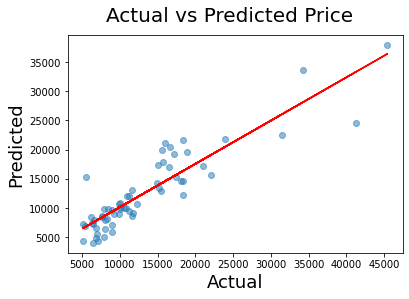

In [14]:
fig = plt.figure()
m, b = np.polyfit(pca_y_test, pca_y_pred, 1)
plt.plot(pca_y_test, m * pca_y_test + b, color='red')
plt.scatter(pca_y_test, pca_y_pred, alpha=.5)
fig.suptitle('Actual vs Predicted Price', fontsize=20)
plt.xlabel('Actual', fontsize=18)
plt.ylabel('Predicted', fontsize=18)
plt.show()